In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:

class MomVectorBacktester(object):
    def __init__(self,symbol,start,end,amount,tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.amount = amount
        self.tc= tc
        self.results = None
        self.get_data() 

    def get_data(self):
        raw = pd.read_csv('https://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns = {self.symbol:'price'},inplace=True)
        raw['return'] = np.log(raw/raw.shift(1))
        self.data = raw

    def run_strategy(self,momentum=1):
        self.momentum = momentum
        data = self.data.copy().dropna()
        data['position'] = np.sign(data['return'].rolling(momentum).mean())
        data['strategy'] = data['position'].shift(1) * data['return']
        data.dropna(inplace=True)
        trades = data['position'].diff().fillna(0) !=0
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount*data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount * data['strategy'].cumsum().apply(np.exp)
        self.results = data
        aperf = self.results['cstrategy'].iloc[-1]
        operf = aperf - self.results['cstrategy'].iloc[-1]
        return round(aperf,2), round(operf,2)

    def plot_results(self):
        if self.results is None:
            print('No results to plot yet. Run a strategy')

        title = '%s | TC=%.4f' % (self.symbol,self.tc)
        self.results[['creturns','cstrategy']].plot(title=title,figsize=(10,6))

if __name__ == '__main__':
    mombt = MomVectorBacktester('XAU=','2010-1-1','2020-12-31',1000,0.0)
    print(mombt.run_strategy())
    print(mombt.run_strategy(momentum=2))
    mombt = MomVectorBacktester('XAU=','2010-1-1','2020-12-31',1000,0.001)
    print(mombt.run_strategy(momentum=2))

Writing momvector.py


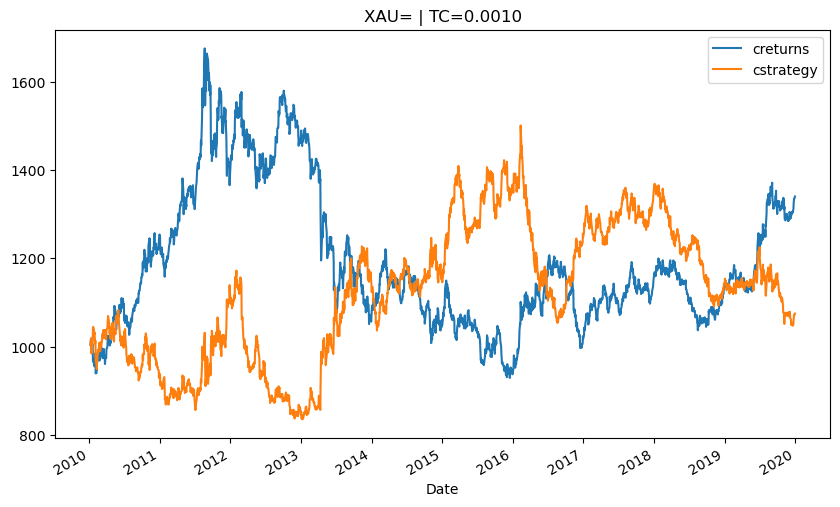

In [4]:
mombt = MomVectorBacktester('XAU=','2010-1-1','2019-12-31',1000,0.0)
mombt = MomVectorBacktester('XAU=','2010-1-1','2019-12-31',1000,0.001)
mombt.run_strategy(momentum=3)
mombt.plot_results()